In [1]:
import os
import sys
import pandas as pd
import numpy as np
from copy import copy
import warnings
import importlib
from IPython.core.interactiveshell import InteractiveShell
from matplotlib import rcParams

rcParams.update({
    "text.usetex": True,                
    "font.family": "serif",            
    "font.serif": ["Computer Modern"], 
    "axes.labelsize": 16,              
    "xtick.labelsize": 16,             
    "ytick.labelsize": 16,             
    "legend.fontsize": 16,            
    "figure.titlesize": 0,             
    "axes.titlesize": 0,              
})
notebook_dir = os.getcwd()

project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
if project_root not in sys.path:
    sys.path.append(project_root)
    
utils_path = os.path.join(project_root, "utils")
if utils_path not in sys.path:
    sys.path.append(utils_path)

    
import get_data

In [2]:
# combined_df, patientIds = get_data.get_dataset()
# #SAVE DATAFRAME
# DATA_PATH = get_data.get_dataset_abspath()
# save_path = os.path.join(DATA_PATH, "raw_combined_data.parquet")
# combined_df.to_parquet(save_path, compression="snappy")

In [3]:
#ACCESS DATAFRAME
DATA_PATH = get_data.get_dataset_abspath()
load_path = os.path.join(DATA_PATH, "raw_combined_data.parquet")
combined_df = pd.read_parquet(load_path)

In [4]:
import analyse_data

df_A = combined_df[combined_df['dataset'] == 'A']
df_B = combined_df[combined_df['dataset'] == 'B']
importlib.reload(analyse_data)
analyse_data.summariseSeperateDatasets(df_A, "A")
analyse_data.summariseSeperateDatasets(df_B, "B")



Hospital system: A
  Number of patients: 20336
  Number of septic patients: 1790
  Sepsis prevalence: 8.8%
  Number of rows: 790215
  Number of entries: 11876446
  Density of entries: 35.0%


Hospital system: B
  Number of patients: 20000
  Number of septic patients: 1142
  Sepsis prevalence: 5.7%
  Number of rows: 761995
  Number of entries: 11356429
  Density of entries: 34.7%




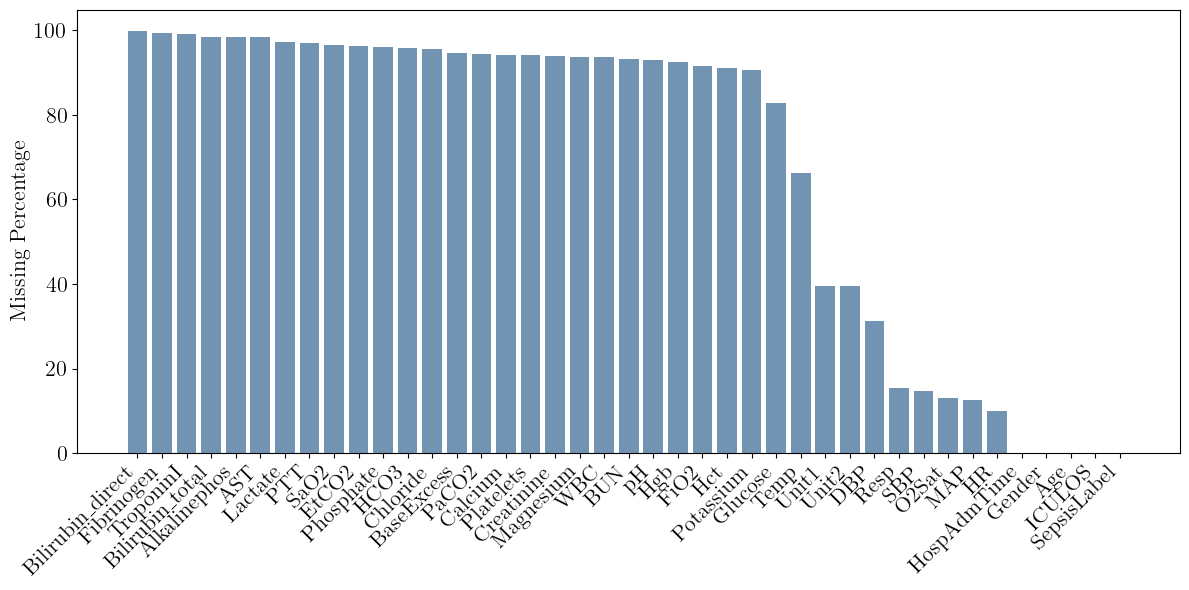

In [9]:
importlib.reload(analyse_data)
#analyse_data.summaryStatistics(combined_df)
#analyse_data.covariance(combined_df)
analyse_data.nullCols(combined_df)
#analyse_data.distributions(combined_df)
#analyse_data.plot_average_lab_trajectories(combined_df)
#analyse_data.plot_sepsis_by_age_bucket(combined_df)
#analyse_data.plot_percentage_sepsis_grid(combined_df)
#analyse_data.plot_avg_missing_data_sepsis(combined_df)
#analyse_data.plot_density_of_actual_values(combined_df)
#analyse_data.plot_inbalance_pie_chart()

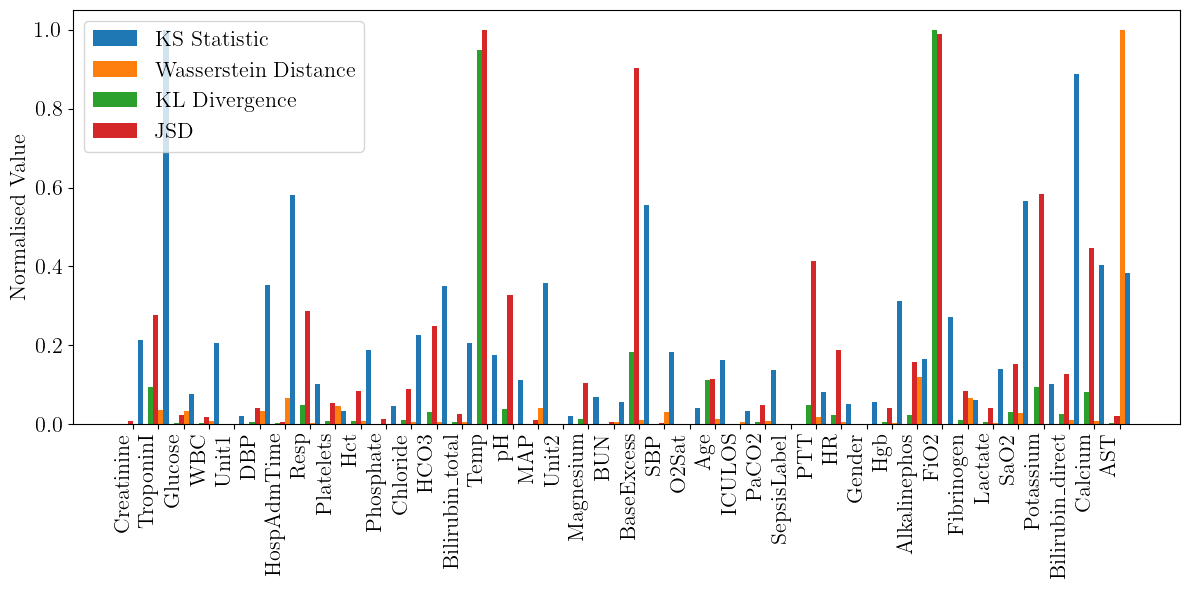

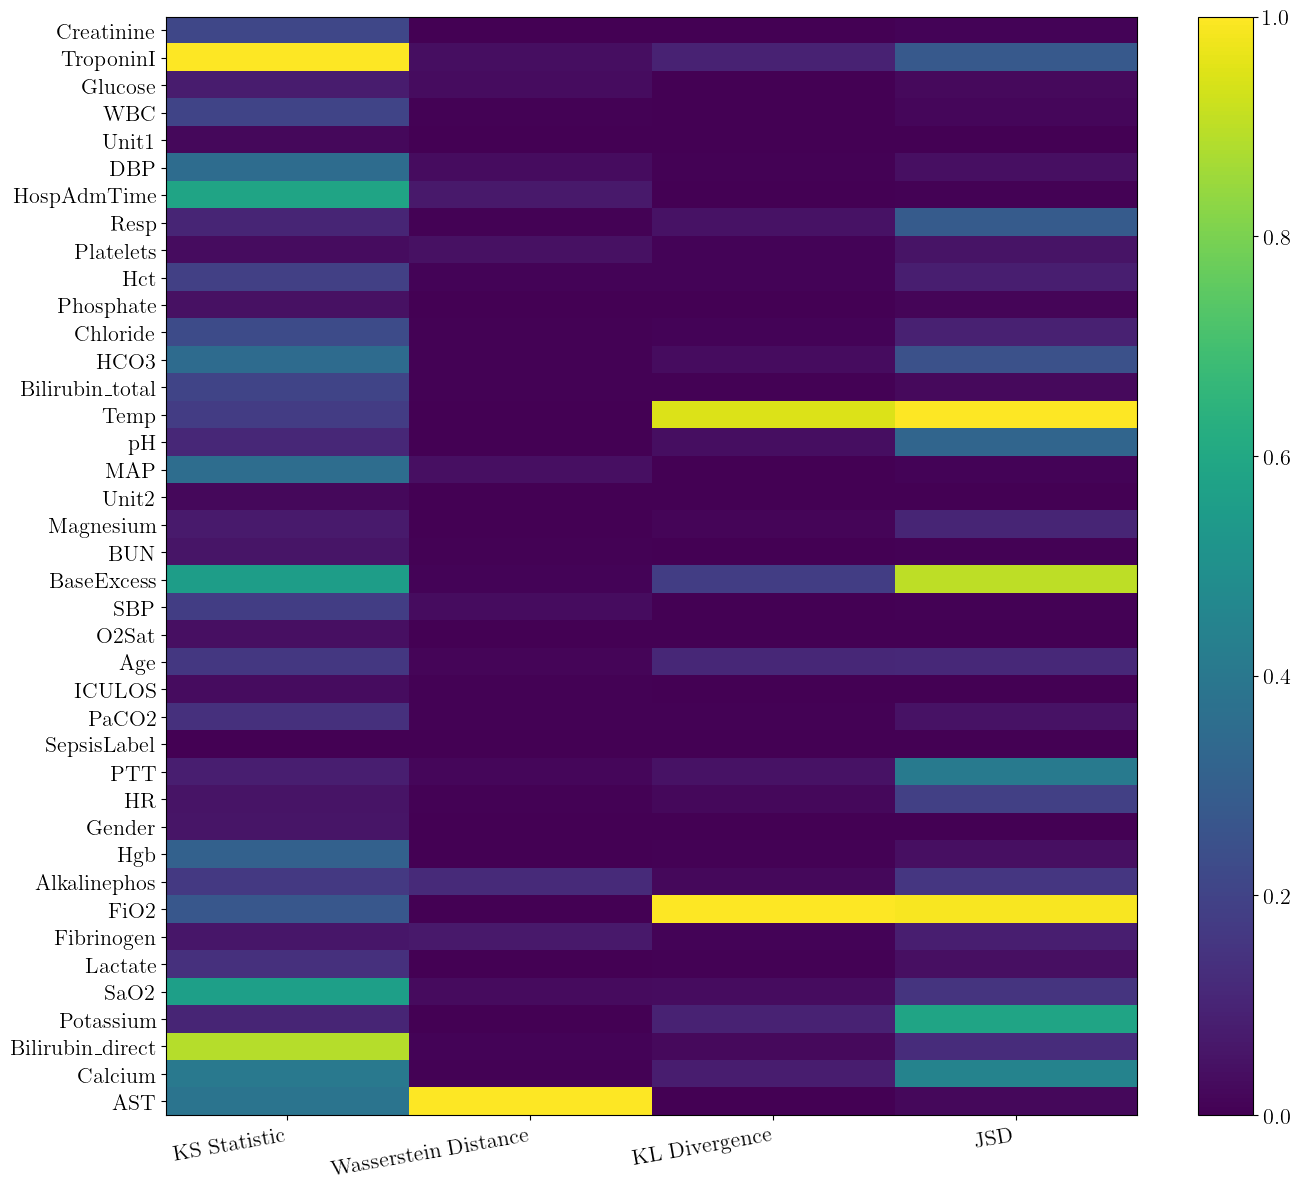

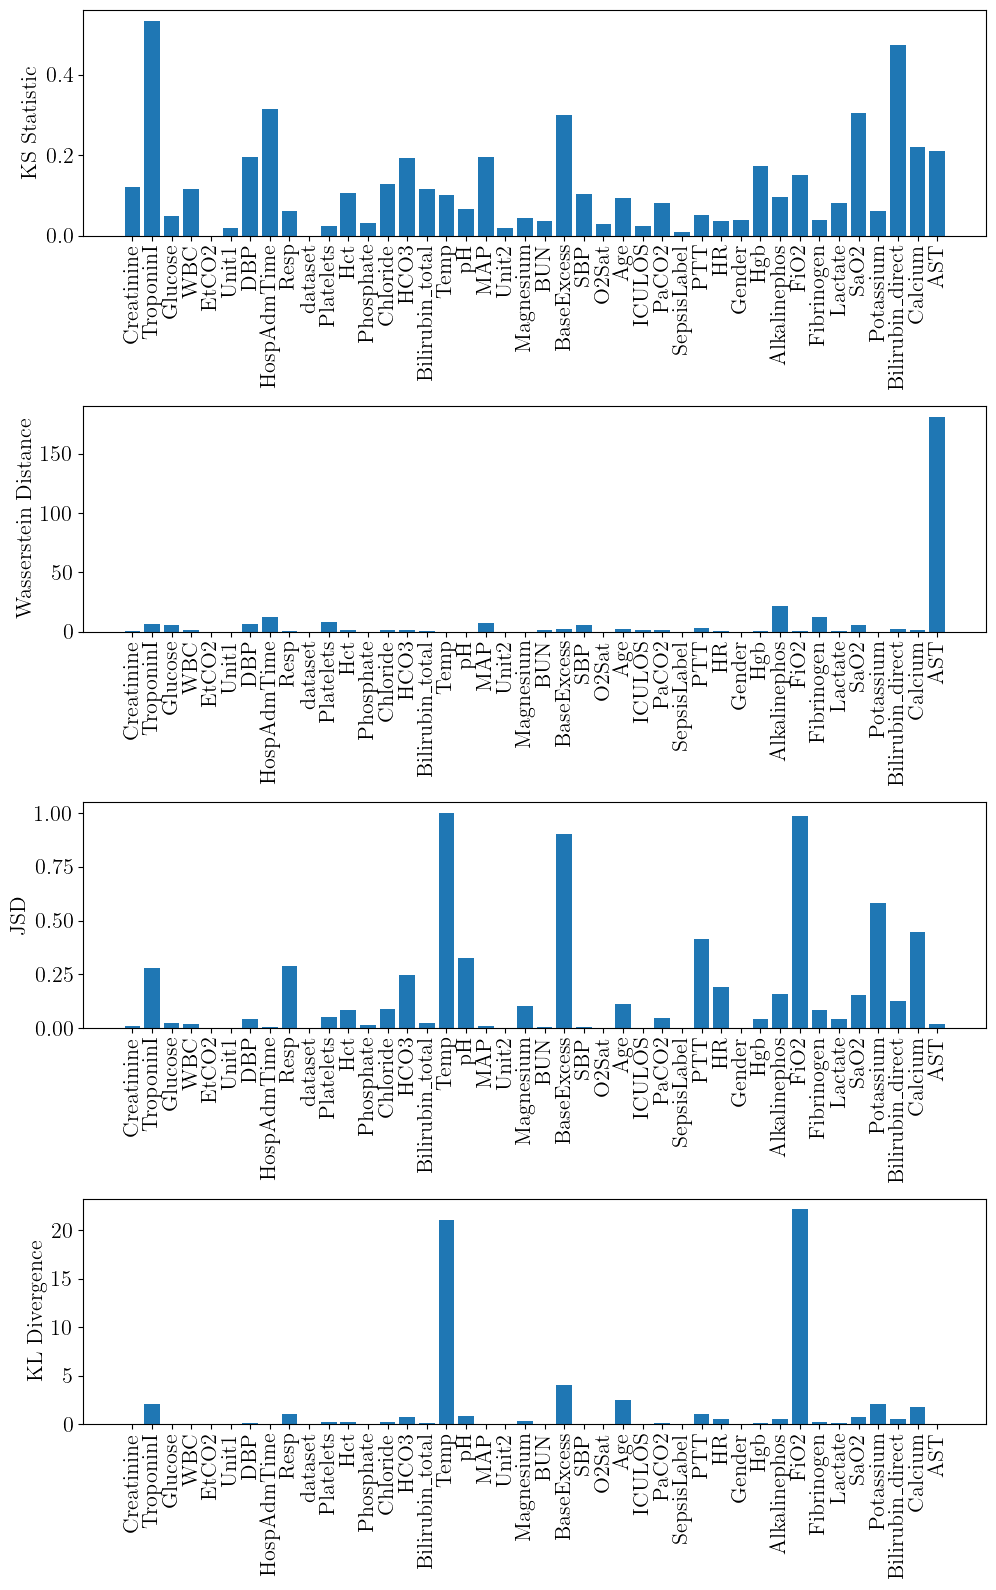

Column: Creatinine
  KS Statistic: 0.12049973671989667
  Wasserstein Distance: 0.23897656210871804
  JSD: 0.008192397468968163
  KL Divergence: 0.02038394924227773
  Valid Merge: True


Column: TroponinI
  KS Statistic: 0.5338013896931094
  Wasserstein Distance: 6.637889138072253
  JSD: 0.2778269362946855
  KL Divergence: 2.0892414144227587
  Valid Merge: True


Column: Glucose
  KS Statistic: 0.04810369180060853
  Wasserstein Distance: 5.889132133378504
  JSD: 0.024995288333573614
  KL Divergence: 0.0722861409894502
  Valid Merge: True


Column: WBC
  KS Statistic: 0.11585844647626459
  Wasserstein Distance: 1.2977109221738334
  JSD: 0.017630595391072906
  KL Divergence: 0.05067593543946677
  Valid Merge: True


Column: EtCO2
  Note: Not enough numeric data for reliable metrics.
  Valid Merge: True


Column: Unit1
  KS Statistic: 0.018463903637734314
  Wasserstein Distance: 0.018463903637734314
  JSD: 0.00024593716687001623
  KL Divergence: 0.0006819571597287306
  Valid Merge: True




In [6]:

importlib.reload(analyse_data)
metrics = analyse_data.compare_two_datasets(df_A, df_B)
analyse_data.plot_combined_metrics(metrics)
analyse_data.plot_combined_heatmap(metrics)
analyse_data.plot_metrics(metrics)

for col, met in metrics.items():
    print(f"Column: {col}")
    for metric, value in met.items():
        print(f"  {metric}: {value}")
    print("\n")
#open text editor to view



In [7]:

importlib.reload(analyse_data)
analyse_data.plot_feature_presence_by_prevalence(combined_df)


ValueError: Invalid RGBA argument: 'lightred'

<Figure size 1200x800 with 2 Axes>

Feature Prevalence (percentage of patients with at least one data point):
HR: 99.99%
O2Sat: 99.96%
Resp: 99.82%
MAP: 99.74%
SBP: 99.30%
Temp: 99.30%
Glucose: 96.08%
Potassium: 95.37%
BUN: 95.00%
Creatinine: 94.92%
Hct: 94.26%
Hgb: 93.93%
Platelets: 93.61%
WBC: 93.49%
Magnesium: 87.78%
Calcium: 86.76%
DBP: 81.63%
Phosphate: 70.21%
Chloride: 53.08%
PTT: 50.17%
HCO3: 50.12%
pH: 46.94%
PaCO2: 45.51%
FiO2: 44.15%
AST: 35.59%
Bilirubin_total: 35.32%
Alkalinephos: 35.14%
BaseExcess: 32.75%
SaO2: 32.45%
Lactate: 30.97%
TroponinI: 17.49%
Fibrinogen: 11.19%
EtCO2: 7.97%
Bilirubin_direct: 5.10%
